In [9]:
from puzzle16 import *

In [2]:
%timeit apply_ntimes(list(map(int, "80871224585914546619083218645595")), 100)

32 ms ± 630 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [3]:
%timeit apply_ntimes2(list(map(int, "80871224585914546619083218645595")), 100)

25 ms ± 3.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [4]:
def plot_pattern(ax=None, input_len=100):
    coef_mat = np.empty((input_len, input_len))
    for output_phase in range(1, input_len + 1):
        iter = pattern_iter(gen_pattern(output_phase))
        row = take(input_len, iter)
        coef_mat[output_phase - 1] = row
    ax.imshow(coef_mat)

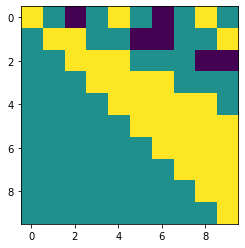

In [5]:
fig, ax = plt.subplots()
plot_pattern(ax, 10)

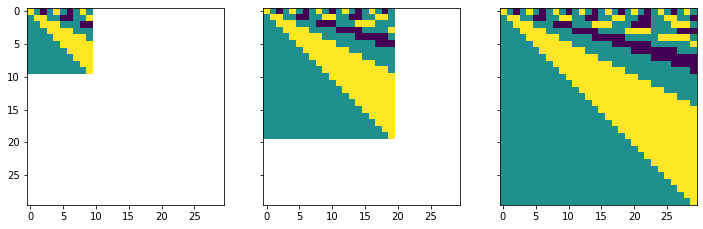

In [6]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 4), sharex=True, sharey=True)
plot_pattern(ax[0], 10)
plot_pattern(ax[1], 20)
plot_pattern(ax[2], 30)

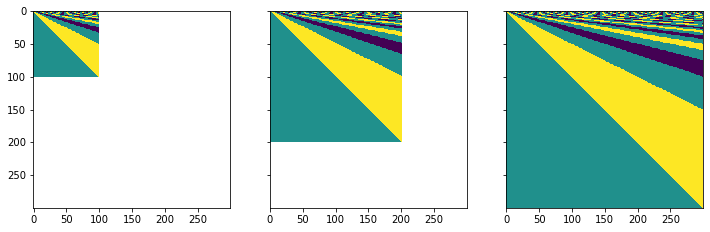

In [7]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 4), sharex=True, sharey=True)
plot_pattern(ax[0], 100)
plot_pattern(ax[1], 200)
plot_pattern(ax[2], 300)

In [8]:
import numba as nb

In [35]:
@nb.jit
def keep_ones_digit(n):
    return (abs(n) % 10) * np.sign(n)

@nb.jit
def gen_pattern(output_elem):
    pattern = []
    base_pattern = [0, 1, 0, -1]
    for elem in base_pattern:
        pattern.extend([elem for _ in range(output_elem)])
    return pattern
@nb.jit
def pattern_iter(pattern, index=0, skipped_first=False):
    while True:
        if index == 0:
            if not skipped_first:
                skipped_first = True
            else:
                yield pattern[index]
        else:
            yield pattern[index]
        index = (index + 1) % len(pattern)

@nb.jit
def apply3(input_signal):
    output_signal = []
    for output_phase in range(1, len(input_signal) + 1):
        iter = pattern_iter(gen_pattern(output_phase), index=output_phase, skipped_first=True)
        s = 0
        for i, p in zip(input_signal[output_phase - 1:], iter):
            s += i * p
        s = keep_ones_digit(s)
        output_signal.append(s)
    return output_signal

@nb.jit
def apply_ntimes3(input_signal, n):
    signal = input_signal[:]
    for _ in range(n):
        signal = apply3(signal)
    return signal

In [36]:
apply(list(map(int, "12345678")), debug=False)

[4, 8, 2, 2, 6, 1, 5, 8]

In [37]:
apply3(list(map(int, "12345678")))

C:\Anaconda3\envs\ipyvolume\lib\site-packages\numba\ir_utils.py:1969: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'input_signal' of function 'apply3'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "<ipython-input-35-d0e4757606a3>", line 25:
@nb.jit
def apply3(input_signal):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


[-4, -8, 2, 2, 6, 1, 5, 8]

In [38]:
%timeit apply(list(map(int, "12345678120484001380128191234567812048400138012819")))

738 µs ± 41.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [39]:
%timeit apply3(list(map(int, "12345678120484001380128191234567812048400138012819")))

290 µs ± 2.46 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [42]:
%timeit apply_ntimes(list(map(int, "12345678120484001380128191234567812048400138012819")), 10)

8.7 ms ± 1.54 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [41]:
%timeit apply_ntimes3(list(map(int, "12345678120484001380128191234567812048400138012819")), 10)

2.28 ms ± 96.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [44]:
input_list = list(map(int, open('data/input16').read().strip()))

In [45]:
len(input_list)

650

In [49]:
input_list = list(map(int, "03036732577212944063491565474664")) * 10000

In [50]:
len(input_list)

320000

In [ ]:
result = apply_ntimes3(input_list, 100)